In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

# Tabela e analise

In [4]:
data = pd.read_csv('tabela.csv')

In [5]:
data.head()

,Valor Unitário,Área total,Desempenho Agropecuário,Aptidão,Proximidade com a rodovia
0,42424.24,99.0,2,1,0
1,36842.11,95.0,2,1,0
2,75000.00,20.0,2,1,1
3,80000.00,50.0,2,1,0
4,60000.00,115.0,2,1,0


In [7]:
data.describe()

,Valor Unitário,Área total,Desempenho Agropecuário,Aptidão,Proximidade com a rodovia
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,64412.226111,235.911111,1.555556,1.666667,0.333333
std,29450.402092,691.090495,0.511310,0.907485,0.485071
min,11733.150000,2.000000,1.000000,1.000000,0.000000
25%,43837.410000,12.800000,1.000000,1.000000,0.000000
50%,63333.335000,45.000000,2.000000,1.000000,0.000000
75%,78750.000000,102.750000,2.000000,2.750000,1.000000
max,120000.000000,2983.000000,2.000000,3.000000,1.000000


<Axes: >

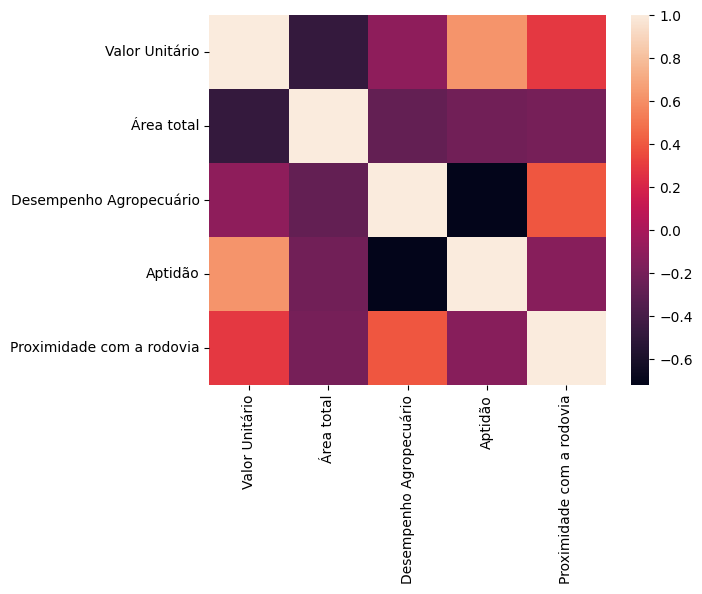

In [24]:
sns.heatmap(data.corr())

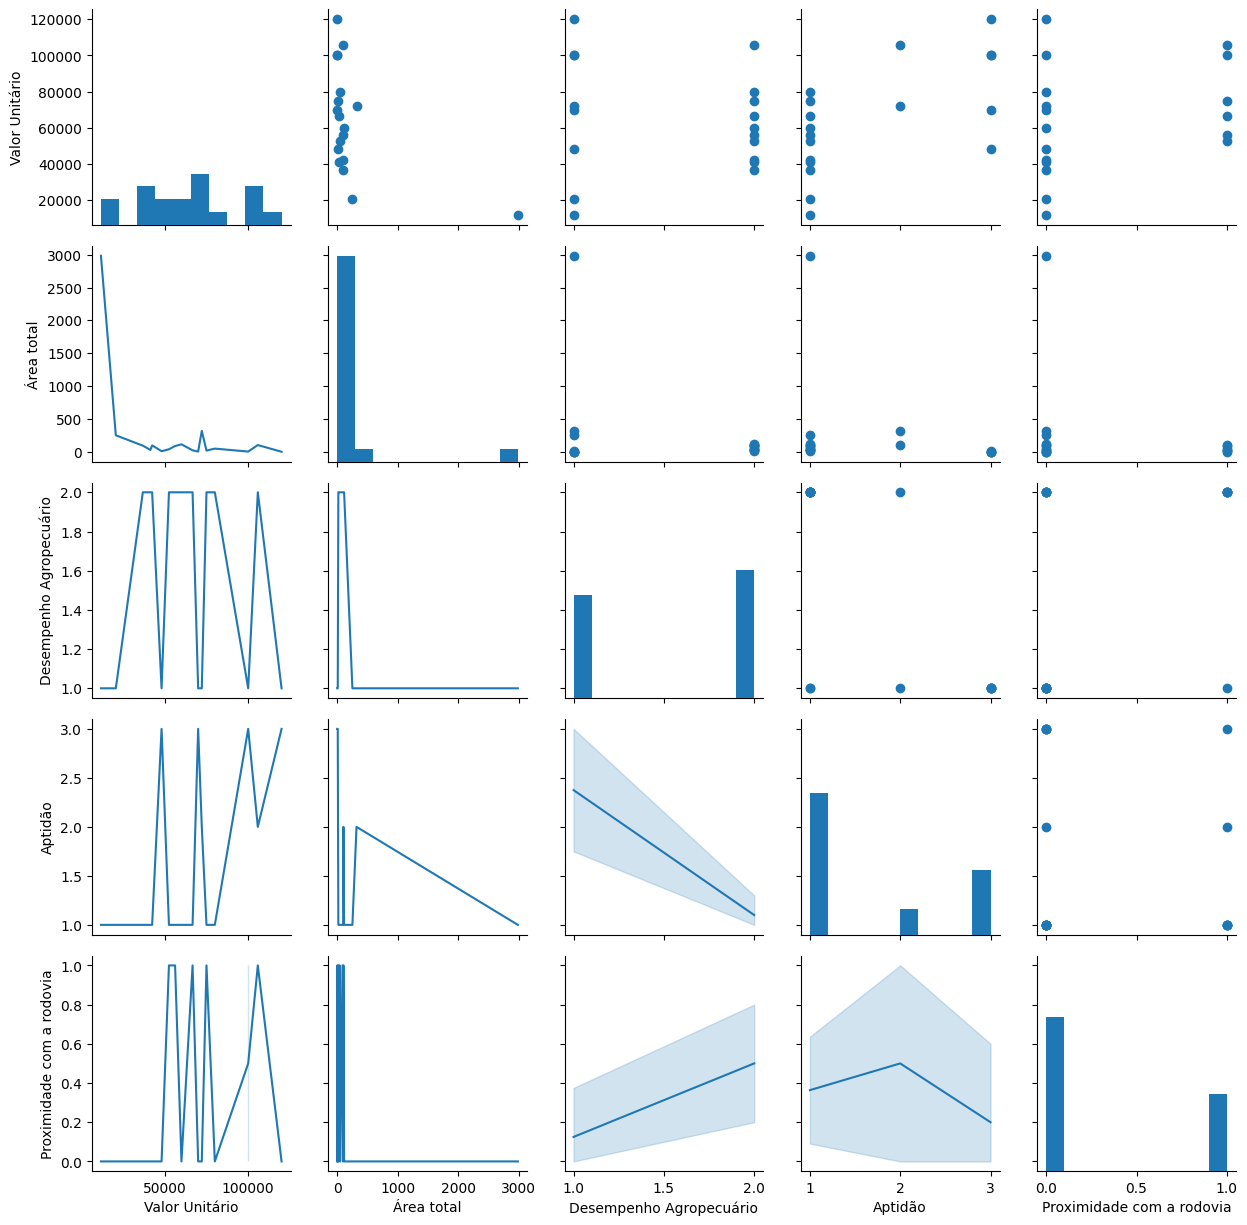

In [14]:
g = sns.PairGrid(data)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)

# Modelo

In [297]:
X = data.drop('Valor Unitário', axis=1)
Y = data['Valor Unitário']

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=3, test_size=0.25)

In [317]:
lr = LinearRegression()

In [318]:
lr.fit(X_train, y_train)

LinearRegression()

In [319]:
lr.score(X_test, y_test)

0.5052714399725331

In [320]:
print(lr.intercept_)

-57527.09251804244


In [321]:
print(lr.coef_)

[-1.33290986e+00  3.86785209e+04  3.48503200e+04  6.97171014e+03]


In [322]:
coefs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefs'])

In [323]:
coefs

,Coefs
Área total,-1.332910
Desempenho Agropecuário,38678.520910
Aptidão,34850.320016
Proximidade com a rodovia,6971.710136


In [324]:
predict = lr.predict(X_test)

Text(0, 0.5, 'Valor Previsto')

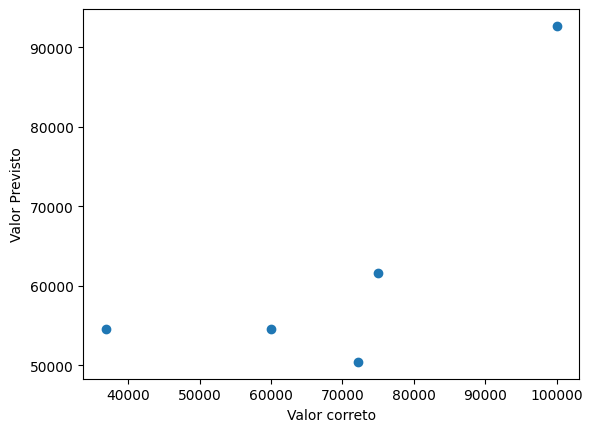

In [325]:
plt.scatter(y_test, predict)
plt.xlabel("Valor correto")
plt.ylabel("Valor Previsto")

/tmp/ipykernel_7882/812406535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predict))


<Axes: xlabel='Valor Unitário', ylabel='Density'>

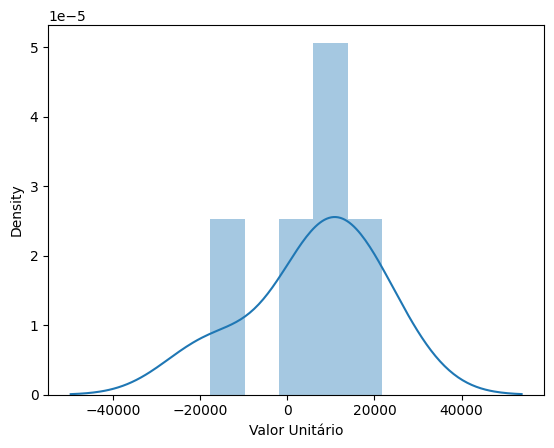

In [326]:
sns.distplot((y_test-predict))

In [327]:
print("MAE:", mean_absolute_error(y_test, predict))

MAE: 13130.48454691235


In [328]:
print("MSE:", mean_squared_error(y_test, predict))

MSE: 209972865.05481595


In [329]:
print("r2 score: ", r2_score(y_test, predict))

r2 score:  0.5052714399725331


In [330]:
scores = cross_val_score(lr, X, Y, cv=5, scoring='r2')

print(scores,"\n")

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.12755925  0.77254232  0.22521858 -7.67750043 -3.09611189] 

Accuracy: -1.93 (+/- 3.18)
